## Low Frequency toolKit  

Using the low frequency toolkit, we can plot daily and seasonal plots of the data.

Import the toolKit:

In [11]:
from hera import toolkitHome

projectName = "DOCUMENTATION"
tk = toolkitHome.getToolkit(toolkitName=toolkitHome.METEOROLOGY_LOWFREQ, projectName=projectName)

Provide your project name if you wish to use data which is loaded into it.

Let's use an example of the 'MASSADA' data station:

In [12]:
import pandas as pd

data = pd.read_parquet("../../../data/lowfrequency/MASSADA.parquet")
data

,datetime,Rain,TD,RH,TG,TDmax,TDmin
0,2011-01-01T00:10:00+02:00,0.0,12.1,98.0,10.8,12.2,12.1
1,2011-01-01T00:20:00+02:00,0.0,12.2,98.0,11.1,12.2,12.2
2,2011-01-01T00:30:00+02:00,0.0,12.1,98.0,10.8,12.2,12.0
3,2011-01-01T00:40:00+02:00,0.0,12.1,98.0,11.2,12.1,12.0
4,2011-01-01T00:50:00+02:00,0.0,12.0,98.0,10.6,12.1,11.9
...,...,...,...,...,...,...,...
707263,2024-06-24T10:20:00+03:00,0.0,35.3,49.0,44.3,35.4,35.1
707264,2024-06-24T10:30:00+03:00,0.0,35.6,49.0,45.0,35.7,35.3
707265,2024-06-24T10:40:00+03:00,0.0,35.5,49.0,44.6,35.8,35.3
707266,2024-06-24T10:50:00+03:00,0.0,35.9,48.0,45.6,36.1,35.5


Specify a "field" you want to plot (a field is a column inside the dataframe):

In [13]:
FIELD = "TG"

### Daily Scatter plot  

<Axes: xlabel='Time [Hours]', ylabel='TG'>

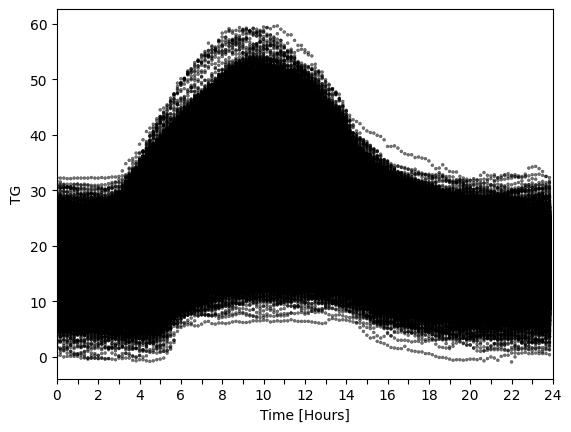

In [14]:
tk.presentation.dailyPlots.plotScatter(data,FIELD)

### Specific Date Line Plot

(<Axes: title={'center': 'TG for 2011-05-30'}, xlabel='Time [Hours]', ylabel='TG'>,
 [<matplotlib.lines.Line2D at 0x7de738f1d2d0>])

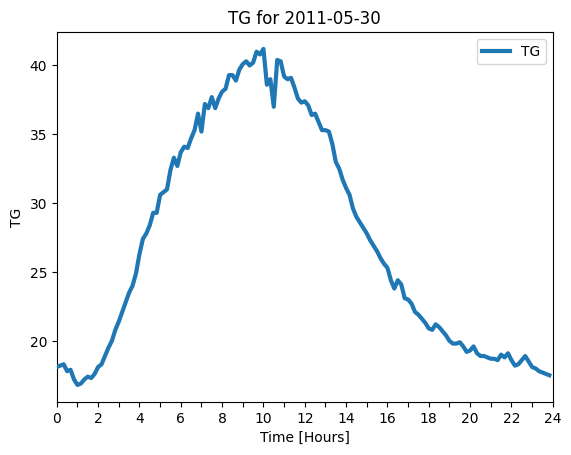

In [15]:
tk.presentation.dailyPlots.dateLinePlot(data,FIELD,'2011-05-30')

**Note**: You must provide a date with %Y-%M-%D format.

### Daily Probability Contourf Plot

(<matplotlib.contour.QuadContourSet at 0x7de72eeb6490>,
 <Axes: xlabel='Time [Hours]', ylabel='TG'>)

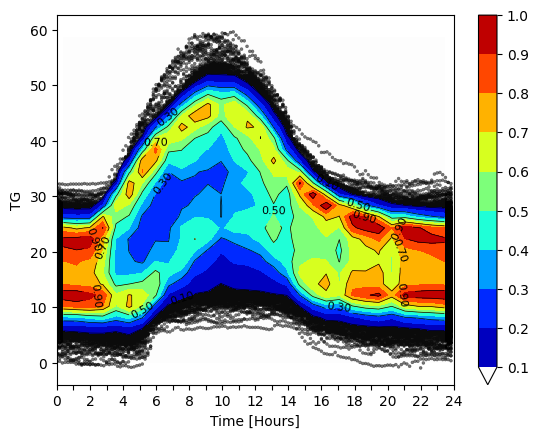

In [16]:
tk.presentation.dailyPlots.plotProbContourf(data,FIELD)

### Seasonal Probability Contourf Plot

array([[<Axes: title={'center': 'Winter [DJF]'}, xlabel='Time [Hours]', ylabel='TG'>,
        <Axes: title={'center': 'Spring [MAM]'}, xlabel='Time [Hours]', ylabel='TG'>],
       [<Axes: title={'center': 'Summer [JJA]'}, xlabel='Time [Hours]', ylabel='TG'>,
        <Axes: title={'center': 'Autumn [SON]'}, xlabel='Time [Hours]', ylabel='TG'>]],
      dtype=object)

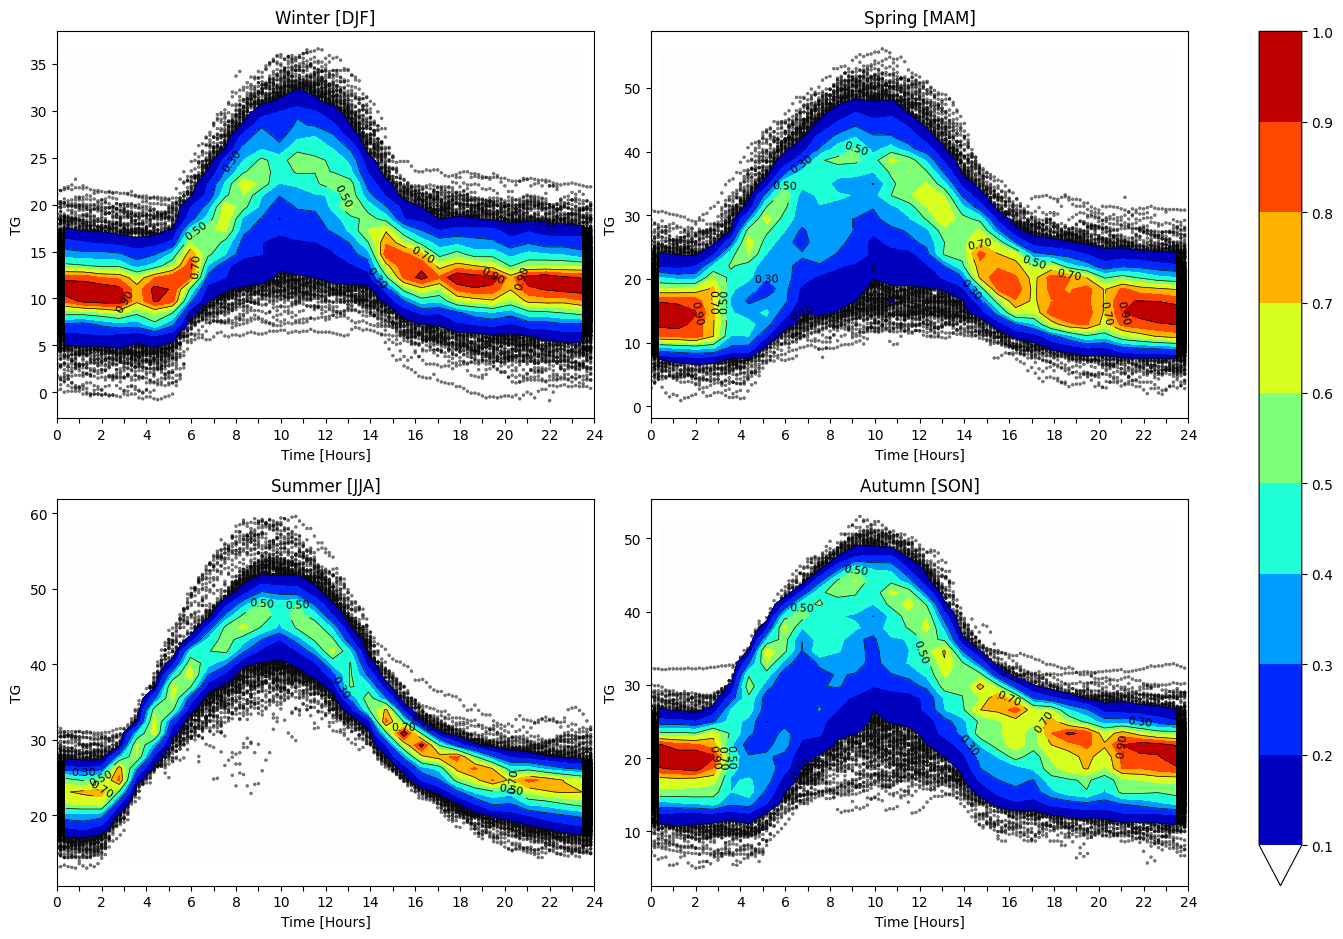

In [17]:
tk.presentation.seasonalPlots.plotProbContourf_bySeason(data,FIELD)

### Combined Graph

(<Axes: title={'center': 'TG for 2011-05-30'}, xlabel='Time [Hours]', ylabel='TG'>,
 [<matplotlib.lines.Line2D at 0x7de7309ffe90>])

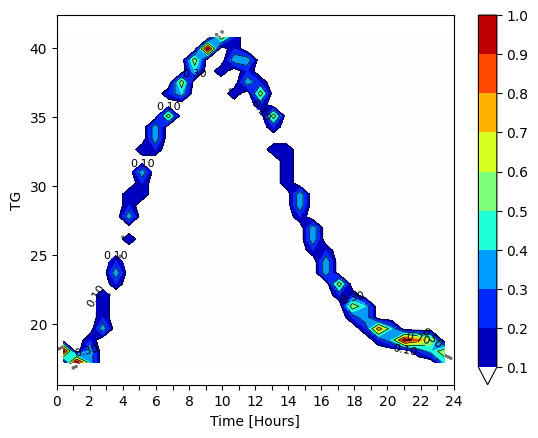

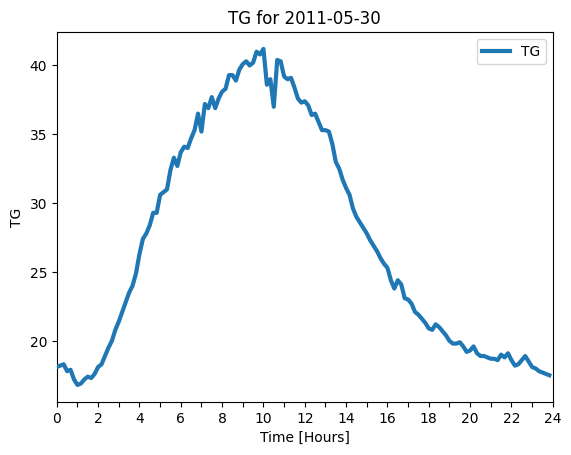

In [18]:
DATE = '2011-05-30'

date_date = data.copy()
date_date['datetime'] = pd.to_datetime(date_date['datetime'],utc=True)
date_date = date_date[date_date['datetime'].dt.date == pd.to_datetime(DATE).date()]


tk.presentation.dailyPlots.plotProbContourf(date_date,FIELD)
tk.presentation.dailyPlots.dateLinePlot(data,FIELD,DATE)

## Analysis layer  

You can also use the analysis layer for analysis of the data.

In [19]:
hourDistArrays = tk.presentation.analysis.calcHourlyDist(data,FIELD)
hourDistArrays[0]

array([-0.48333333, -0.45      , -0.41666667, -0.38333333, -0.35      ,
       -0.31666667, -0.28333333, -0.25      , -0.21666667, -0.18333333,
       -0.15      , -0.11666667, -0.08333333, -0.05      , -0.01666667,
        0.01666667,  0.05      ,  0.08333333,  0.11666667,  0.15      ,
        0.18333333,  0.21666667,  0.25      ,  0.28333333,  0.31666667,
        0.35      ,  0.38333333,  0.41666667,  0.45      ,  0.48333333])